# EXPLORATORY DATA ANALYSIS

## Understanding the Dataset

#### What we know:

Data Set: FD001
Train trajectories: 100
Test trajectories: 100
Conditions: ONE (Sea Level)
Fault Modes: ONE (HPC Degradation)

Data Set: FD002
Train trajectories: 260
Test trajectories: 259
Conditions: SIX 
Fault Modes: ONE (HPC Degradation)

Data Set: FD003
Train trajectories: 100
Test trajectories: 100
Conditions: ONE (Sea Level)
Fault Modes: TWO (HPC Degradation, Fan Degradation)

Data Set: FD004
Train trajectories: 248
Test trajectories: 249
Conditions: SIX 
Fault Modes: TWO (HPC Degradation, Fan Degradation)

Data sets consists of multiple multivariate time series. Each data set is further divided into training and test subsets. Each time series is from a different engine, i.e., the data can be considered to be from a fleet of engines of the same type. Each engine starts with different degrees of initial wear and manufacturing variation which is unknown to the user. This wear and variation is considered normal, i.e., it is not considered a fault condition. There are three operational settings that have a substantial effect on engine performance. These settings are also included in the data. The data is contaminated with sensor noise.

The engine is operating normally at the start of each time series, and develops a fault at some point during the series. In the training set, the fault grows in magnitude until system failure. In the test set, the time series ends some time prior to system failure. The objective of the competition is to predict the number of remaining operational cycles before failure in the test set, i.e., the number of operational cycles after the last cycle that the engine will continue to operate. Also provided a vector of true Remaining Useful Life (RUL) values for the test data.

The data are provided as a zip-compressed text file with 26 columns of numbers, separated by spaces. Each row is a snapshot of data taken during a single operational cycle, each column is a different variable. The columns correspond to:
1)	unit number
2)	time, in cycles
3)	operational setting 1
4)	operational setting 2
5)	operational setting 3
6)	sensor measurement  1
7)	sensor measurement  2
...
26)	sensor measurement  21

## Loading Imports and Data

#### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

In [3]:
project_root = Path().resolve().parent  # Assuming you're running the script from the notebooks directory

train_FD001_data = pd.read_csv(project_root/'data/raw/CMAPSSData/train_FD001.txt', sep=' ', header=None)
test_FD001_data = pd.read_csv(project_root/'data/raw/CMAPSSData/test_FD001.txt', sep=' ', header=None)
train_FD002_data = pd.read_csv(project_root/'data/raw/CMAPSSData/train_FD002.txt', sep=' ', header=None)
test_FD002_data = pd.read_csv(project_root/'data/raw/CMAPSSData/test_FD002.txt', sep=' ', header=None)
train_FD003_data = pd.read_csv(project_root/'data/raw/CMAPSSData/train_FD003.txt', sep=' ', header=None)
test_FD003_data = pd.read_csv(project_root/'data/raw/CMAPSSData/test_FD003.txt', sep=' ', header=None)
train_FD004_data = pd.read_csv(project_root/'data/raw/CMAPSSData/train_FD004.txt', sep=' ', header=None)
test_FD004_data = pd.read_csv(project_root/'data/raw/CMAPSSData/test_FD004.txt', sep=' ', header=None)

## Identifying Anomalies

#### Check Shape

In [4]:

print('train_FD001_data Shape: ', train_FD001_data.shape)
print('test_FD001_data Shape: ', test_FD001_data.shape)
print('train_FD002_data Shape: ', train_FD002_data.shape)
print('test_FD002_data Shape: ', test_FD002_data.shape)
print('train_FD003_data Shape: ', train_FD003_data.shape)
print('test_FD0013_data Shape: ', test_FD003_data.shape)
print('train_FD004_data Shape: ', train_FD004_data.shape)
print('test_FD004_data Shape: ', test_FD004_data.shape)

train_FD001_data Shape:  (20631, 28)
test_FD001_data Shape:  (13096, 28)
train_FD002_data Shape:  (53759, 28)
test_FD002_data Shape:  (33991, 28)
train_FD003_data Shape:  (24720, 28)
test_FD0013_data Shape:  (16596, 28)
train_FD004_data Shape:  (61249, 28)
test_FD004_data Shape:  (41214, 28)


The shapes of each dataset have two extra columns at than what is given in the description. Lets find out more.

#### Manual Inspection of Head

In [5]:
print(train_FD001_data.head())
print(test_FD001_data.head())
print(train_FD002_data.head())
print(test_FD002_data.head())
print(train_FD003_data.head())
print(test_FD003_data.head())
print(train_FD004_data.head())
print(test_FD004_data.head())

   0   1       2       3      4       5       6        7        8      9   \
0   1   1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60  14.62   
1   1   2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14  14.62   
2   1   3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20  14.62   
3   1   4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87  14.62   
4   1   5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22  14.62   

   ...       18      19    20   21    22     23     24       25  26  27  
0  ...  8138.62  8.4195  0.03  392  2388  100.0  39.06  23.4190 NaN NaN  
1  ...  8131.49  8.4318  0.03  392  2388  100.0  39.00  23.4236 NaN NaN  
2  ...  8133.23  8.4178  0.03  390  2388  100.0  38.95  23.3442 NaN NaN  
3  ...  8133.83  8.3682  0.03  392  2388  100.0  38.88  23.3739 NaN NaN  
4  ...  8133.80  8.4294  0.03  393  2388  100.0  38.90  23.4044 NaN NaN  

[5 rows x 28 columns]
   0   1       2       3      4       5       6        7        8     

It seems that the .head() function isn't picking up on the extra columns.

#### Check for missing Values

In [6]:
print(train_FD001_data.isnull().sum())
print(test_FD001_data.isnull().sum())
print(train_FD002_data.isnull().sum())
print(test_FD002_data.isnull().sum())
print(train_FD003_data.isnull().sum())
print(test_FD003_data.isnull().sum())
print(train_FD004_data.isnull().sum())
print(test_FD004_data.isnull().sum())

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26    20631
27    20631
dtype: int64
0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26    13096
27    13096
dtype: int64
0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25

It seems like the two extra columns are two empty columns at the end of each dataset. These will be dropped in the preprocessing notebook.

#### Checking Data Types

In [7]:
print('train_FD001_data')
print(train_FD001_data.dtypes)
print('test_FD001_data')
print(test_FD001_data.dtypes)
print('\n')
print('train_FD002_data')
print(train_FD002_data.dtypes)
print('test_FD002_data')
print(test_FD002_data.dtypes)
print('\n')
print('train_FD003_data')
print(train_FD003_data.dtypes)
print('test_FD003_data')
print(test_FD003_data.dtypes)
print('\n')
print('train_FD004_data')
print(train_FD004_data.dtypes)
print('test_FD004_data')
print(test_FD004_data.dtypes)

train_FD001_data
0       int64
1       int64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21      int64
22      int64
23    float64
24    float64
25    float64
26    float64
27    float64
dtype: object
test_FD001_data
0       int64
1       int64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21      int64
22      int64
23    float64
24    float64
25    float64
26    float64
27    float64
dtype: object


train_FD002_data
0       int64
1       int64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     floa

The data types look correct as the data should be only numeric values.

#### Verifying the number of Engines for each set of data

Since the unit number is the first column of each dataset, we can use this to find the number of engines.

In [8]:
print(np.unique(train_FD001_data[0]))   # Should be 100
print(np.unique(test_FD001_data[0]))    # Should be 100
print(np.unique(train_FD002_data[0]))   # Should be 260
print(np.unique(test_FD002_data[0]))    # Should be 259
print(np.unique(train_FD003_data[0]))   # Should be 100
print(np.unique(test_FD003_data[0]))    # Should be 100
print(np.unique(train_FD004_data[0]))   # Should be 248
print(np.unique(test_FD004_data[0]))    # Should be 249

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46

The number of engines for each dataset matches up with the given description.

## Summarizing the Data

#### Summary Statistics

In [9]:
print(train_FD001_data.describe())
print(test_FD001_data.describe())
print(train_FD002_data.describe())
print(test_FD002_data.describe())
print(train_FD003_data.describe())
print(test_FD003_data.describe())
print(train_FD004_data.describe())
print(test_FD004_data.describe())

                 0             1             2             3        4   \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.0   
mean      51.506568    108.807862     -0.000009      0.000002    100.0   
std       29.227633     68.880990      0.002187      0.000293      0.0   
min        1.000000      1.000000     -0.008700     -0.000600    100.0   
25%       26.000000     52.000000     -0.001500     -0.000200    100.0   
50%       52.000000    104.000000      0.000000      0.000000    100.0   
75%       77.000000    156.000000      0.001500      0.000300    100.0   
max      100.000000    362.000000      0.008700      0.000600    100.0   

                 5             6             7             8             9   \
count  2.063100e+04  20631.000000  20631.000000  20631.000000  2.063100e+04   
mean   5.186700e+02    642.680934   1590.523119   1408.933782  1.462000e+01   
std    6.537152e-11      0.500053      6.131150      9.000605  3.394700e-12   
min    5.186700e+

#### Visualization of the Sensor Data

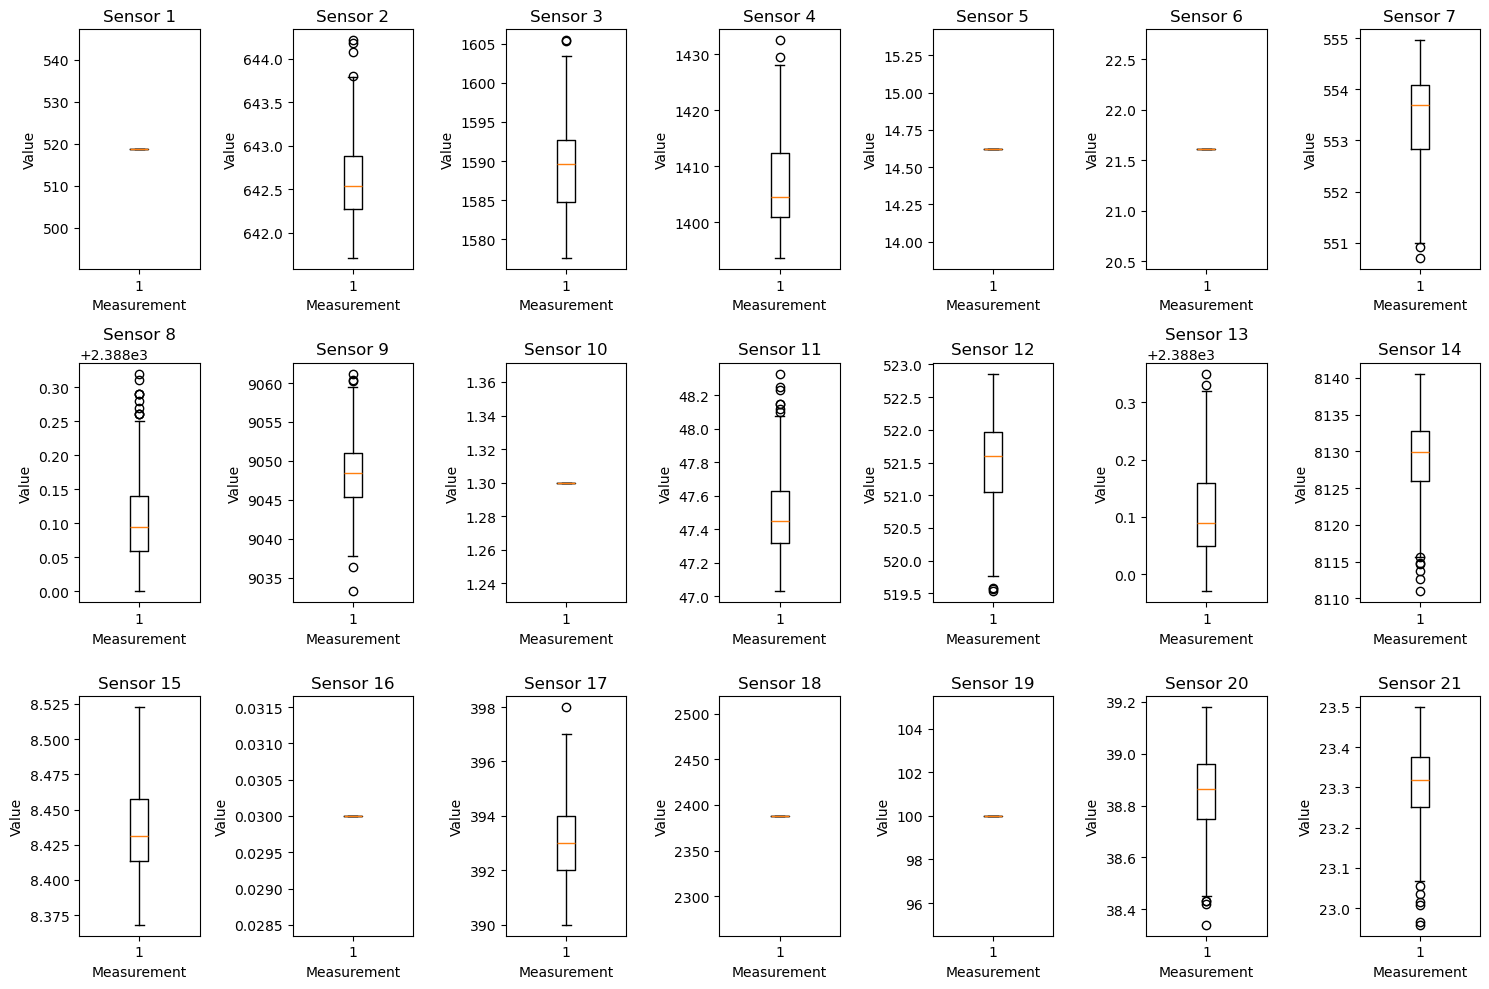

In [11]:
unit_id = 1
dataset = train_FD001_data

# Change the values above to see data from other engines/datasets

sensor_start = 5
sensor_end = 26
num_sensors = sensor_end - sensor_start

rows = 3
cols = 7

fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
axes = axes.flatten()

for i, sensor_idx in enumerate(np.arange(sensor_start, sensor_end)):
    data = dataset[dataset[0] == unit_id][sensor_idx]
    axes[i].boxplot(data)
    axes[i].set_title(f"Sensor {sensor_idx - 4}")
    axes[i].set_xlabel("Measurement")
    axes[i].set_ylabel("Value")

for ax in axes[num_sensors:]:
    ax.axis("off")

plt.tight_layout()
plt.show()

Lets also see how the sensor data looks for one engine from start to failure.

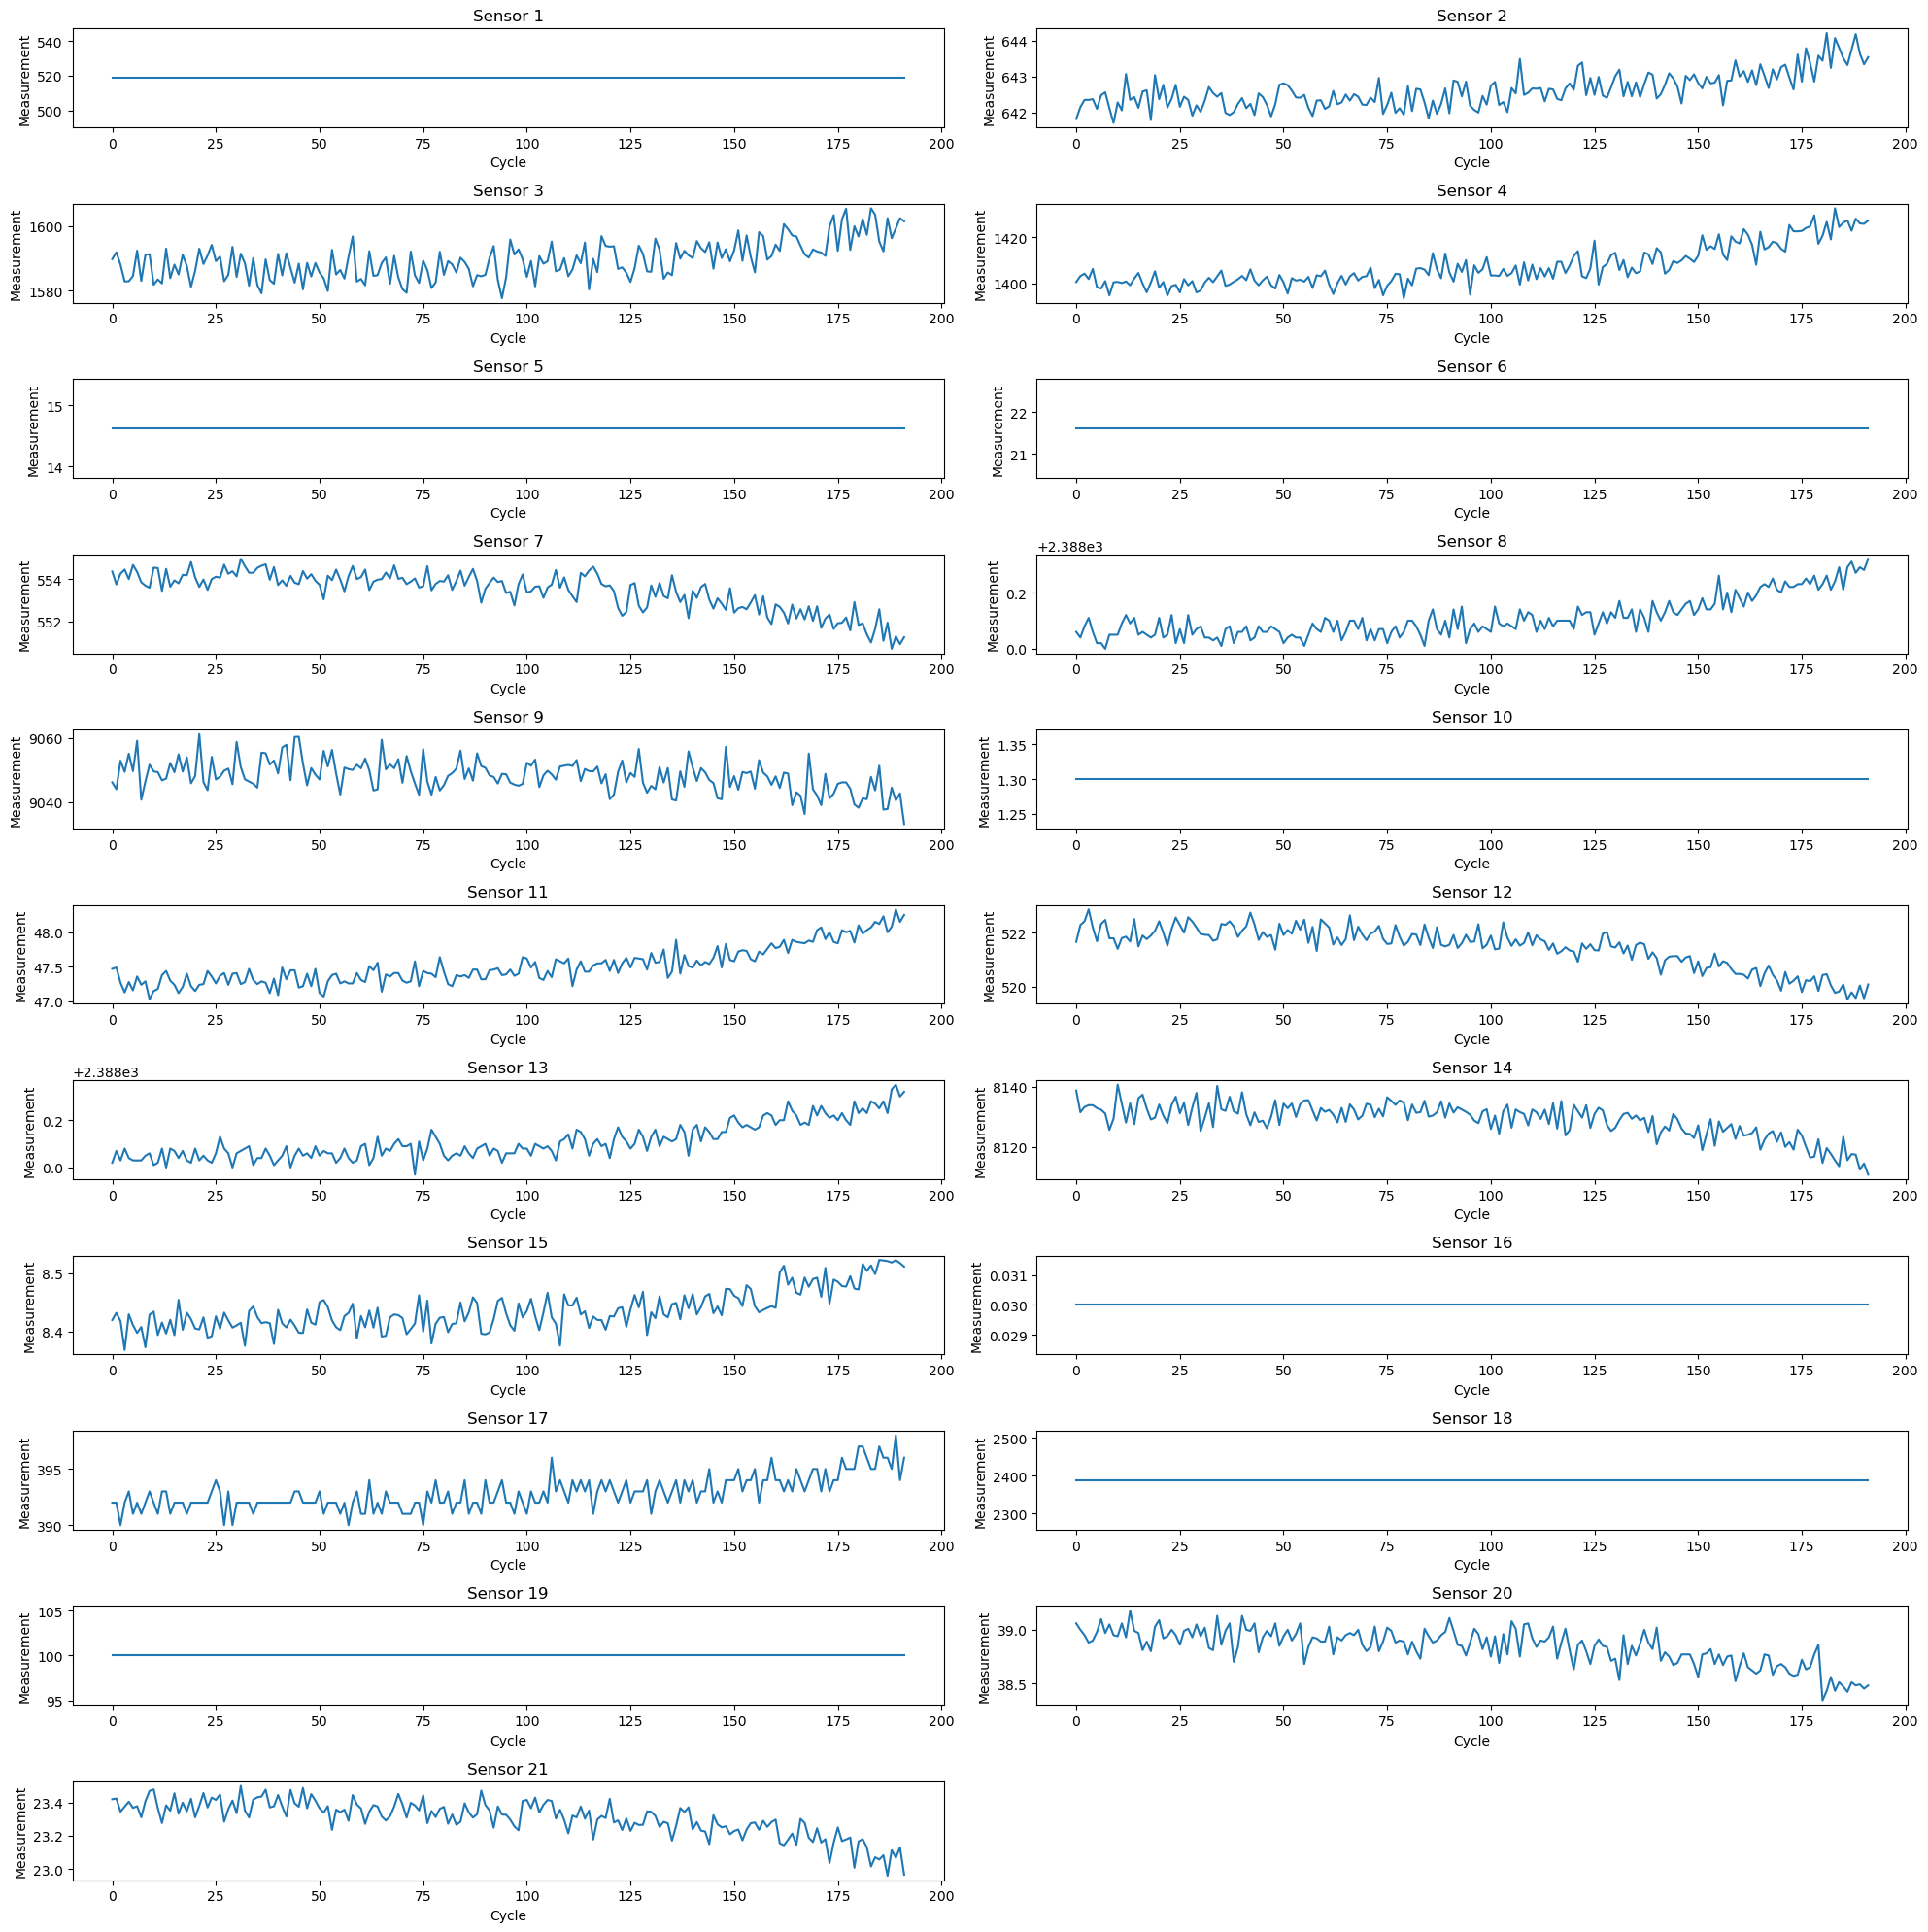

In [14]:
unit_id = 1
dataset = train_FD001_data

# Change the values above to see data from other engines/datasets

sensor_start = 5
sensor_end = 26
num_sensors = sensor_end - sensor_start

rows = 11
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
axes = axes.flatten()

for i, sensor_idx in enumerate(np.arange(sensor_start, sensor_end)):
    # We will look at 
    data = dataset[dataset[0] == unit_id][sensor_idx]
    axes[i].plot(data)
    axes[i].set_title(f"Sensor {sensor_idx - 4}")
    axes[i].set_xlabel("Cycle")
    axes[i].set_ylabel("Measurement")

for ax in axes[num_sensors:]:
    ax.axis("off")

plt.tight_layout()
plt.show()

Several general trends can be visually seen here for engine 1 in train_FD001.txt as it cycles to failure.
1. Sensors 2, 3, 4, 8, 11, 13, 15, and 17 increase as the engine approaches failure.
2. Sensors 7, 9, 12, 14, 20, and 21 decrease as the engine approaches failure.
3. Sensors 1, 5, 6, 10, 16, 18, 19 are constant throughout the engines lifespan.

It is important to note that these trends vary depending on the condition and fault modes.
1. train_FD001 and train_FD003 both seem to have general trends that can be visually determined.
2. train_FD002 and train_FD004 do not, the sensors all display erratic behavior.

To quantify this, lets use the correlation function.

#### Correlation between Sensor Data and RUL

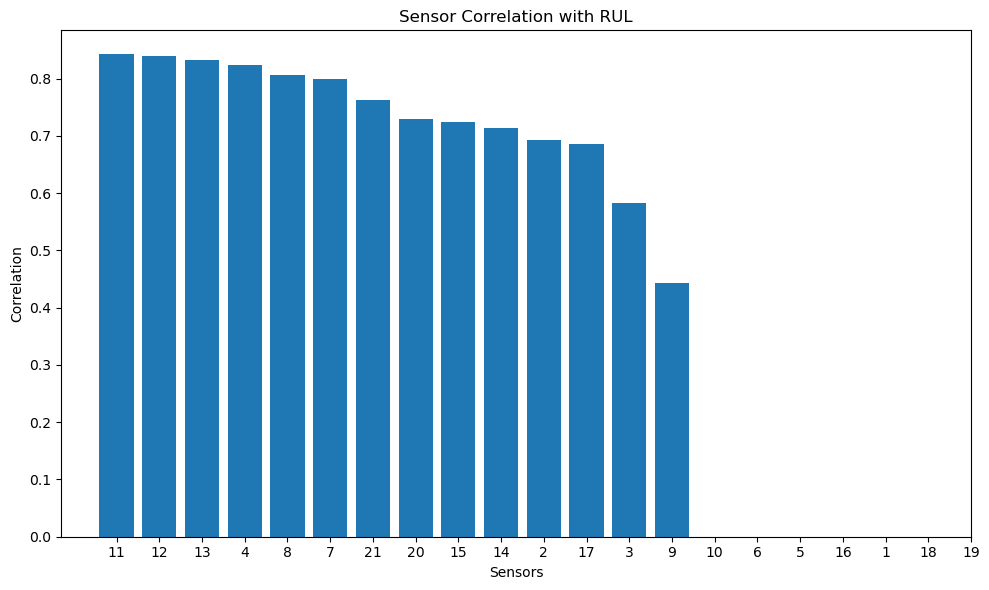

Sorted Correlations with RUL:
15    0.842075
16    0.838586
17    0.832732
8     0.824079
12    0.805492
11    0.798544
25    0.763344
24    0.729856
19    0.723805
18    0.713154
6     0.693328
21    0.685718
7     0.583419
13    0.442325
14    0.000000
10    0.000000
9     0.000000
20    0.000000
5          NaN
22         NaN
23         NaN
dtype: float64


In [13]:
data = train_FD001_data
unit_id = 1

# Change the values above to see data from other datasets

dataset = data[data[0] == unit_id]

sensor_start = 5
sensor_end = 26

max_cycles = dataset.groupby(0)[1].max()

# RUL for each row in the dataset
dataset['RUL'] = dataset.apply(lambda row: max_cycles[row[0]] - row[1], axis=1)

sensors = dataset.iloc[:, sensor_start:sensor_end]
rul = dataset['RUL']

correlation = sensors.corrwith(rul)
correlation_sorted = correlation.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(range(len(correlation_sorted)), correlation_sorted.values, 
        tick_label=[f'{i-4}' for i in correlation_sorted.index])
plt.title('Sensor Correlation with RUL')
plt.ylabel('Correlation')
plt.xlabel('Sensors')
plt.tight_layout()
plt.show()
print("Sorted Correlations with RUL:")
print(correlation_sorted)

For train_FD001 and train_FD003, 
1. The correlation values align with our visual inspection.
We will be taking the significant sensor data as our features during our data processing section.

For train_FD002 and train_FD004, 
1. It seems all sensors have low correlation with the RUL. We will keep all sensor data as our features.